# 🌼   데이터 불러오기


* 라이브러리 추가

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway


pd.set_option('display.max_rows', 30)

plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=10)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=13) # figure title 폰트 크기

* 데이터 불러오기

In [ ]:
#@title
df = pd.read_csv('/content/drive/MyDrive/코드스테이츠/Project/vgames2.csv')
df = df.drop(columns='Unnamed: 0')
df.set_index("Name", inplace=True)
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,,,,
Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


# 0.데이터 전처리

* 데이터타입 확인

In [ ]:
#@title

# 데이터 컬럼 및 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, Candace Kane's Candy Factory to The King of Fighters '95
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Platform     16598 non-null  object 
 1   Year         16327 non-null  float64
 2   Genre        16548 non-null  object 
 3   Publisher    16540 non-null  object 
 4   NA_Sales     16598 non-null  object 
 5   EU_Sales     16598 non-null  object 
 6   JP_Sales     16598 non-null  object 
 7   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.1+ MB


* 결측치 확인

In [ ]:
#@title
# 결측치 확인
df.isnull().sum()

Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

## 0.1 Sales 데이터 전처리

**- K,M 단위 제거 및 단위통일(M 기준)**


**- 총합 출고량 칼럼 생성  <=  지역별 출고량(NA, EU, JP, Other)**

* K단위 표기 데이터 파악

In [ ]:
#@title
# 출고량 K단위 표기 파악
df[(df['NA_Sales'].str.contains("K"))|(df['EU_Sales'].str.contains("K"))|(df['JP_Sales'].str.contains("K"))|(df['Other_Sales'].str.contains("K"))]

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,,,,
Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
Bugs Bunny: Lost in Time,PS,1999.0,Platform,Infogrames,0.22,0.15,0K,0.03
Tom Clancy's Ghost Recon: Predator,PSP,2010.0,Shooter,Ubisoft,0.07,0.02,0K,0.02
Rozen Maiden: Gebetgarten,PS2,2007.0,Fighting,Taito,0,0K,0.01,0
...,...,...,...,...,...,...,...,...
NBA Ballers: Chosen One,PS3,2008.0,Sports,Midway Games,0.12,0,0K,0.01
Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12
Planet Monsters,GBA,2001.0,Action,Titus,0.01,0K,0,0


* M단위 표기 데이터 파악

In [ ]:
#@title
# 출고량 M단위 표기 파악
df[(df['NA_Sales'].str.contains("M"))|(df['EU_Sales'].str.contains("M"))|(df['JP_Sales'].str.contains("M"))|(df['Other_Sales'].str.contains("M"))]

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,,,,
Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
Advance Wars: Dual Strike,DS,2005.0,Strategy,Nintendo,0.3,0.03M,0.04,0.03
SD Gundam Force,GBA,2004.0,Shooter,Namco Bandai Games,0.01,0,0,0M
Teenage Mutant Ninja Turtles,XB,2003.0,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
Max Payne,GBA,2003.0,Shooter,Take-Two Interactive,0.02,0.01M,0,0
...,...,...,...,...,...,...,...,...
Yu-Gi-Oh! Ultimate Masters: World Championship Tournament 2006,GBA,2006.0,Misc,Konami Digital Entertainment,0.14,0.05,0.07,0.01M
Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0
Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006.0,Action,505 Games,0,0,0.07M,0


* K,M 제거 및 단위통일

In [ ]:
def K_delete(x):
    x=x.replace("K","-").replace("M", "")
    if x.find("-")>0:
        x=float(x.replace("-",""))/1000
    return x

df['NA_Sales'] = df["NA_Sales"].apply(K_delete).astype(float)
df['EU_Sales'] = df["EU_Sales"].apply(K_delete).astype(float)
df['JP_Sales'] = df["JP_Sales"].apply(K_delete).astype(float)
df['Other_Sales'] = df["Other_Sales"].apply(K_delete).astype(float)

* Total_Sales 칼럼 생성

In [ ]:
#@title
df["Total_Sales"] = df["NA_Sales"]+df["EU_Sales"]+df["JP_Sales"]+df["Other_Sales"]
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


## 0.2 Year 데이터 전처리

* 결측치 확인

In [ ]:
#@title
df.loc[df[df["Year"].isnull()].index].head(15)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11
Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0.00,0.22,1.62
Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0.00,0.35,1.12
Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00,0.02
Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01,0.07
Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0.00,0.00,0.00,0.03
Majesty 2: The Fantasy Kingdom Sim,PC,2009.0,Simulation,Paradox Interactive,0.01,0.00,0.00,0.00,0.01
Famista 64,N64,NaN,Sports,Namco Bandai Games,0.00,0.00,0.17,0.03,0.20


* 결측치 대체(동일게임 데이터 활용)

In [ ]:
#@title
for i in df[df["Year"].isnull()].index:
    if type(df.loc[i, "Year"]) == np.float64:
        # 데이터에 동일 게임명 1개만 있는 경우 제외
        pass
    elif len(df.loc[i, "Year"].dropna().unique()) == 0:
        pass
        #동일 게임명이 있더라도 Year데이터가 없는 경우
    else:
        df.loc[i,"Year"] = df.loc[i,"Year"].fillna(df.loc[i, "Year"].dropna().unique()[0])

In [ ]:
#@title
df.loc[df[df["Year"].isnull()].index].head(15)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11
Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0.00,0.22,1.62
Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0.00,0.35,1.12
Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00,0.02
Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01,0.07
Famista 64,N64,NaN,Sports,Namco Bandai Games,0.00,0.00,0.17,0.03,0.20
Twisted Metal: Small Brawl,PS,NaN,Action,Unknown,0.10,0.07,0.00,0.01,0.18
Tribes: Aerial Assault,PS2,NaN,Shooter,Unknown,0.11,0.09,0.00,0.03,0.23


* 출고량 1(M)이상 데이터는 외부데이터를 통해 입력

In [ ]:
#@title
df.loc[df[df["Year"].isnull()].index][df.loc[df[df["Year"].isnull()].index]["Total_Sales"]>1]

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.0,0.20,2.11
Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0.0,0.22,1.62
Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0.0,0.35,1.12
Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.0,0.04,1.03
wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,0.58,0.40,0.0,0.07,1.05
Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.0,0.20,2.11


In [ ]:
df.loc["Rock Band", "Year"] = 2007
df.loc["Donkey Kong Land III", "Year"] = 1997
df.loc["wwe Smackdown vs. Raw 2006", "Year"] = 2004
df.loc["Legacy of Kain: Soul Reaver", "Year"] = 1999
df.loc["Adventure", "Year"] = 1980
df.loc["Triple Play 99", "Year"] = 1998
df.loc["Frogger's Adventures: Temple of the Frog", "Year"] = 2001
df.loc["Combat", "Year"] = 1977

# 출처: 위키피디아

* 나머지 결측치는 -1로 대체 (다른 컬럼데이터 활용)

In [ ]:
#@title
df.loc[df['Year'].isnull(),"Year"] = -1

* Year컬럼 입력값 확인

In [ ]:
#@title
df["Year"] = df["Year"].apply(lambda x: int(x))
df["Year"].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993,   -1, 2012, 1987, 1982,   11, 1994, 1990,
         15, 1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8,
       1986,    1,    5,    4,   10,   98,    7,   16,   86,   14,   95,
       2017, 1980, 2020,    2,   13,    0,   12, 1977,   94])

* 잘못 입력된 값 수정

ex)


> 1997 => 97

> 2007 =>7

In [ ]:
#@title
before_year = [9,97,11,15,3,96,6,8,1,5,4,10,98,7,16,86,14,95,2,13,0,12,94]
after_year =  [2009, 1997, 2011,2015,2003,1996,2006,2008,2001,2005,2004,2010,1998,2007,2016,1986,2014,1995,2002,2013,2000,2012,1994]

for i in range(len(before_year)):
    df["Year"].replace(before_year[i],after_year[i], inplace=True)

In [ ]:
#@title
df["Year"].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993,   -1, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983,
       1988, 1981, 1989, 1986, 2017, 1980, 2020, 1977])

## 0.3 Genre 데이터 전처리

* 결측치 확인

In [ ]:
#@title
# 결측치 확인
df.loc[df[df["Genre"].isnull()].index]

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Ape Escape: On the Loose,PSP,2005,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
NBA Ballers,XB,2004,NaN,Midway Games,0.37,0.11,0.00,0.02,0.50
NBA Ballers,PS2,2004,Sports,Midway Games,0.81,0.63,0.00,0.21,1.65
NFL Street,XB,2004,NaN,Electronic Arts,0.49,0.15,0.00,0.02,0.66
NFL Street,PS2,2004,Sports,Electronic Arts,1.15,0.08,0.00,0.19,1.42
...,...,...,...,...,...,...,...,...,...
Need for Speed Underground 2,PS2,2004,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90
Need for Speed Underground 2,GBA,2004,Racing,Electronic Arts,0.31,0.12,0.00,0.01,0.44
Need for Speed Underground 2,GC,2004,Racing,Electronic Arts,0.70,0.39,0.01,0.03,1.13


* 결측치 대체(동일게임 데이터 활용)

In [ ]:
#@title
df["Genre"].unique()

for i in df[df["Genre"].isnull()].index:
    if type(df.loc[i, "Genre"]) == float:
        pass
    else:
        df.loc[i,"Genre"] = df.loc[i,"Genre"].fillna(df.loc[i, "Genre"].dropna().unique()[0])

## 0.4 Publisher 데이터 전처리

* 결측치 확인

In [ ]:
#@title
df.loc[df[df["Publisher"].isnull()].index]

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
UK Truck Simulator,PC,2010,Simulation,NaN,0.00,0.03,0.00,0.00,0.03
All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.17,0.06,0.00,0.00,0.23
Teenage Mutant Ninja Turtles: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.12,0.04,0.00,0.00,0.16
Nicktoons Collection: Game Boy Advance Video Volume 2,GBA,2004,Misc,NaN,0.16,0.06,0.00,0.00,0.22
Monster Hunter Frontier Online,PS3,2010,Role-Playing,NaN,0.00,0.00,0.05,0.00,0.05
...,...,...,...,...,...,...,...,...,...
Yu Yu Hakusho: Dark Tournament,PS2,-1,Fighting,NaN,0.10,0.08,0.00,0.03,0.21
Dream Dancer,DS,-1,Misc,NaN,0.01,0.00,0.00,0.00,0.01
Bound By Flame,PS4,2014,Role-Playing,Focus Home Interactive,0.07,0.08,0.00,0.04,0.19


* 결측치 대체(동일게임 데이터 활용)

In [ ]:
#@title
for i in df[df["Publisher"].isnull()].index:
    if type(df.loc[i, "Publisher"]) == float:
        pass
    else:
        df.loc[i, "Publisher"] = df.loc[i,"Publisher"].fillna(df.loc[i, "Publisher"].dropna().unique()[0])

df.isnull().sum()

Platform        0
Year            0
Genre          30
Publisher      51
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
dtype: int64

# 1.지역별 분석

* 지역별 출고량 총합데이터 활용

## 1.1 지역별 시장점유율

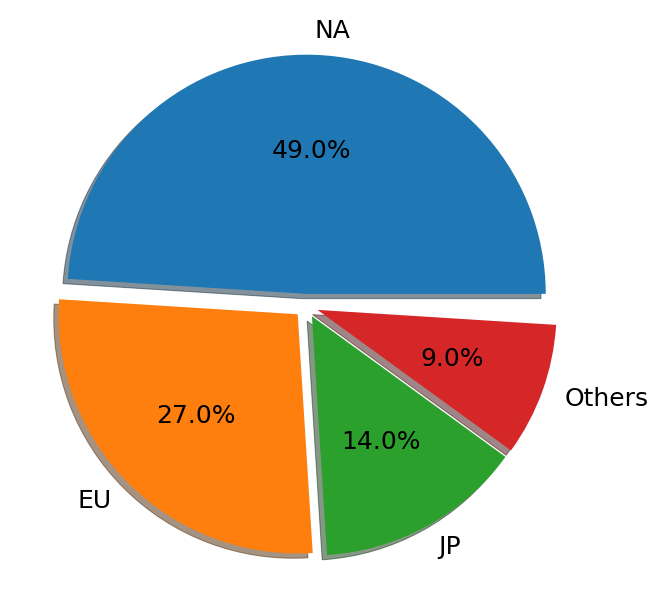

In [ ]:
#@title
ratio = [round(df["NA_Sales"].sum()/df["Total_Sales"].sum(),2),round(df["EU_Sales"].sum()/df["Total_Sales"].sum(),2),round(df["JP_Sales"].sum()/df["Total_Sales"].sum(),2),round(df["Other_Sales"].sum()/df["Total_Sales"].sum(),2)]
labels = ["NA", "EU", "JP", "Others"]

plt.figure(figsize=(11,11))
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=[0.05,0.05,0.05,0.05], shadow=True, textprops={'size':25})
plt.show()

## 1.2 지역별 게임장르 선호도

* 장르별 그룹화

In [ ]:
#@title
df_area_genre = df[["Genre","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
df_area_genre.set_index("Genre", inplace=True)
df_area_genre_sum = df_area_genre.groupby("Genre").sum()
df_area_genre_sum2 = df_area_genre_sum 
df_area_genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,875.32,523.49,157.90,186.76
Adventure,105.66,64.07,52.00,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,408.29,212.40,105.27,74.06
Platform,446.53,201.62,130.65,51.54
Puzzle,123.35,50.73,56.87,12.52
Racing,358.73,237.90,56.40,77.21
Role-Playing,319.54,183.58,344.95,56.96
Shooter,582.60,313.27,38.28,102.69


* MinMaxScaler

In [ ]:
#@title
minmax = MinMaxScaler()
df_area_genre_sum = minmax.fit_transform(df_area_genre_sum)
df_area_genre_sum = pd.DataFrame(df_area_genre_sum, columns=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], index=df_area_genre_sum2.index)
df_area_genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,1.000000,1.000000,0.390061,1.000000
Adventure,0.045821,0.039212,0.044739,0.031072
Fighting,0.192024,0.117113,0.160009,0.144356
Misc,0.421004,0.349415,0.218443,0.357469
Platform,0.468411,0.326871,0.301203,0.229076
Puzzle,0.067752,0.011314,0.060619,0.006613
Racing,0.359562,0.402744,0.059086,0.375428
Role-Playing,0.310977,0.289144,1.000000,0.259977
Shooter,0.637103,0.560366,0.000000,0.520696


* 막대 그래프

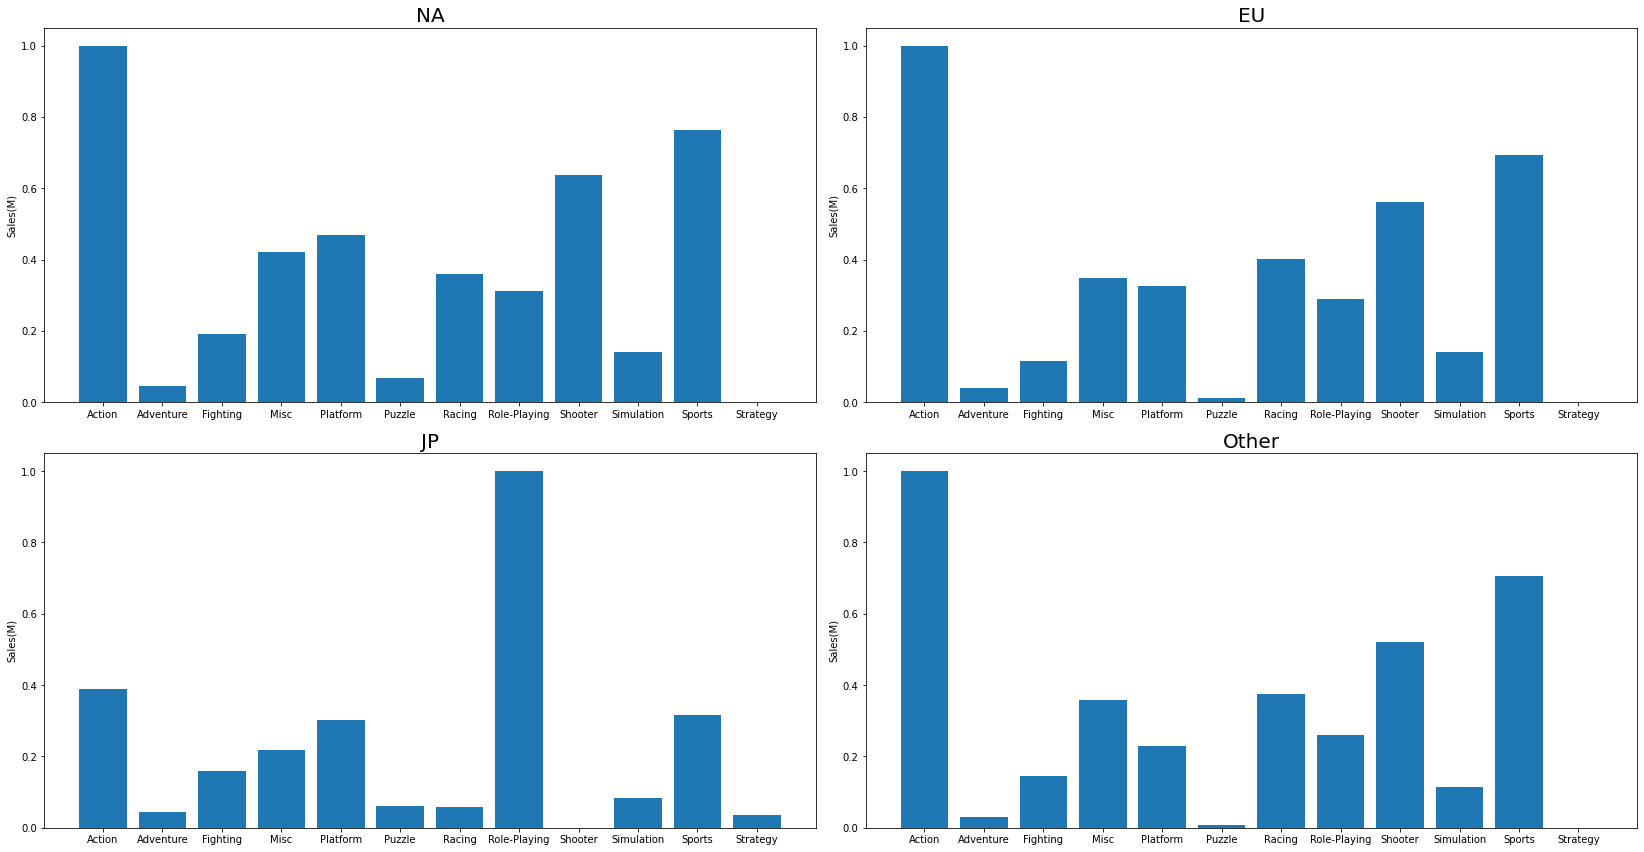

In [ ]:
#@title
# 지역별 장르기준 매출현황 시각화

fig, ax = plt.subplots(2,2, figsize=(23, 12))

'''
ax[0][0].bar(df_area_genre_sum["NA_Sales"].sort_values(ascending=False).index, df_area_genre_sum["NA_Sales"].sort_values(ascending=False))
ax[0][0].set_title("NA", fontsize=20)
ax[0][0].set_ylabel("Sales(M)")
ax[0][0].set_ylim(0,900)

ax[0][1].bar(df_area_genre_sum["EU_Sales"].sort_values(ascending=False).index, df_area_genre_sum["EU_Sales"].sort_values(ascending=False))
ax[0][1].set_title("EU", fontsize=20)
ax[0][1].set_ylabel("Sales(M)")
ax[0][1].set_ylim(0,900)

ax[1][0].bar(df_area_genre_sum["JP_Sales"].sort_values(ascending=False).index, df_area_genre_sum["JP_Sales"].sort_values(ascending=False))
ax[1][0].set_title("JP", fontsize=20)
ax[1][0].set_ylabel("Sales(M)")
ax[1][0].set_ylim(0,900)

ax[1][1].bar(df_area_genre_sum["Other_Sales"].sort_values(ascending=False).index, df_area_genre_sum["Other_Sales"].sort_values(ascending=False))
ax[1][1].set_title("Other" ,  fontsize=20)
ax[1][1].set_ylabel("Sales(M)")
ax[1][1].set_ylim(0,900) 
'''


ax[0][0].bar(df_area_genre_sum["NA_Sales"].index, df_area_genre_sum["NA_Sales"])
ax[0][0].set_title("NA", fontsize=20)
ax[0][0].set_ylabel("Sales(M)")

ax[0][1].bar(df_area_genre_sum["EU_Sales"].index, df_area_genre_sum["EU_Sales"])
ax[0][1].set_title("EU", fontsize=20)
ax[0][1].set_ylabel("Sales(M)")

ax[1][0].bar(df_area_genre_sum["JP_Sales"].index, df_area_genre_sum["JP_Sales"])
ax[1][0].set_title("JP", fontsize=20)
ax[1][0].set_ylabel("Sales(M)")

ax[1][1].bar(df_area_genre_sum["Other_Sales"].index, df_area_genre_sum["Other_Sales"])
ax[1][1].set_title("Other" ,  fontsize=20)
ax[1][1].set_ylabel("Sales(M)")


plt.rc("font", size=12)
plt.rc('axes', labelsize=15)
fig.tight_layout()

* 지역별 TOP3

In [ ]:
#@title
print(pd.DataFrame(df_area_genre_sum2['NA_Sales'].sort_values(ascending=False).head(3)),'\n')
print(pd.DataFrame(df_area_genre_sum2['EU_Sales'].sort_values(ascending=False).head(3)),'\n')
print(pd.DataFrame(df_area_genre_sum2['JP_Sales'].sort_values(ascending=False).head(3)),'\n')
print(pd.DataFrame(df_area_genre_sum2['Other_Sales'].sort_values(ascending=False).head(3)),'\n')

         NA_Sales
Genre            
Action     875.32
Sports     683.35
Shooter    582.60 

         EU_Sales
Genre            
Action     523.49
Sports     376.85
Shooter    313.27 

              JP_Sales
Genre                 
Role-Playing    344.95
Action          157.90
Sports          135.37 

         Other_Sales
Genre               
Action        186.76
Sports        134.97
Shooter       102.69 




* F검정

> 귀무가설: NA와 EU의 장르별 분포는 같다.


> 대립가설: NA와 EU의 장르별 분포는 다르다.

In [ ]:
#@title
Genre_NA = df_area_genre_sum2["NA_Sales"]
Genre_EU = df_area_genre_sum2["EU_Sales"]

print("* 스케일링 X")
print(f_oneway(Genre_NA, Genre_EU), '\n\n')

Genre_NA = df_area_genre_sum["NA_Sales"]
Genre_EU = df_area_genre_sum["EU_Sales"]
print("* 스케일링 O")
f_oneway(Genre_NA, Genre_EU)


* 스케일링 X
F_onewayResult(statistic=3.811847946710849, pvalue=0.06373206330305872) 


* 스케일링 O


F_onewayResult(statistic=0.09961017529610668, pvalue=0.7552724491736156)

> Pvalue > 0.05

> 귀무가설 기각 X


## 1.3 지역별 플랫폼 선호도

* 플랫폼별 그룹화 

In [ ]:
#@title
df_area_Platform = df[["Platform","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
df_area_Platform.set_index("Platform", inplace=True)
df_area_Platform_sum = df_area_Platform.groupby("Platform").sum()
df_area_Platform_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,90.60,5.47,0.00,0.91
3DO,0.00,0.00,0.10,0.00
3DS,78.87,58.52,97.35,12.63
DC,5.43,1.69,8.56,0.27
DS,390.71,194.65,175.57,60.53
...,...,...,...,...
Wii,507.71,268.38,69.35,80.61
WiiU,38.32,24.23,12.79,6.45
X360,601.05,280.58,12.43,85.54


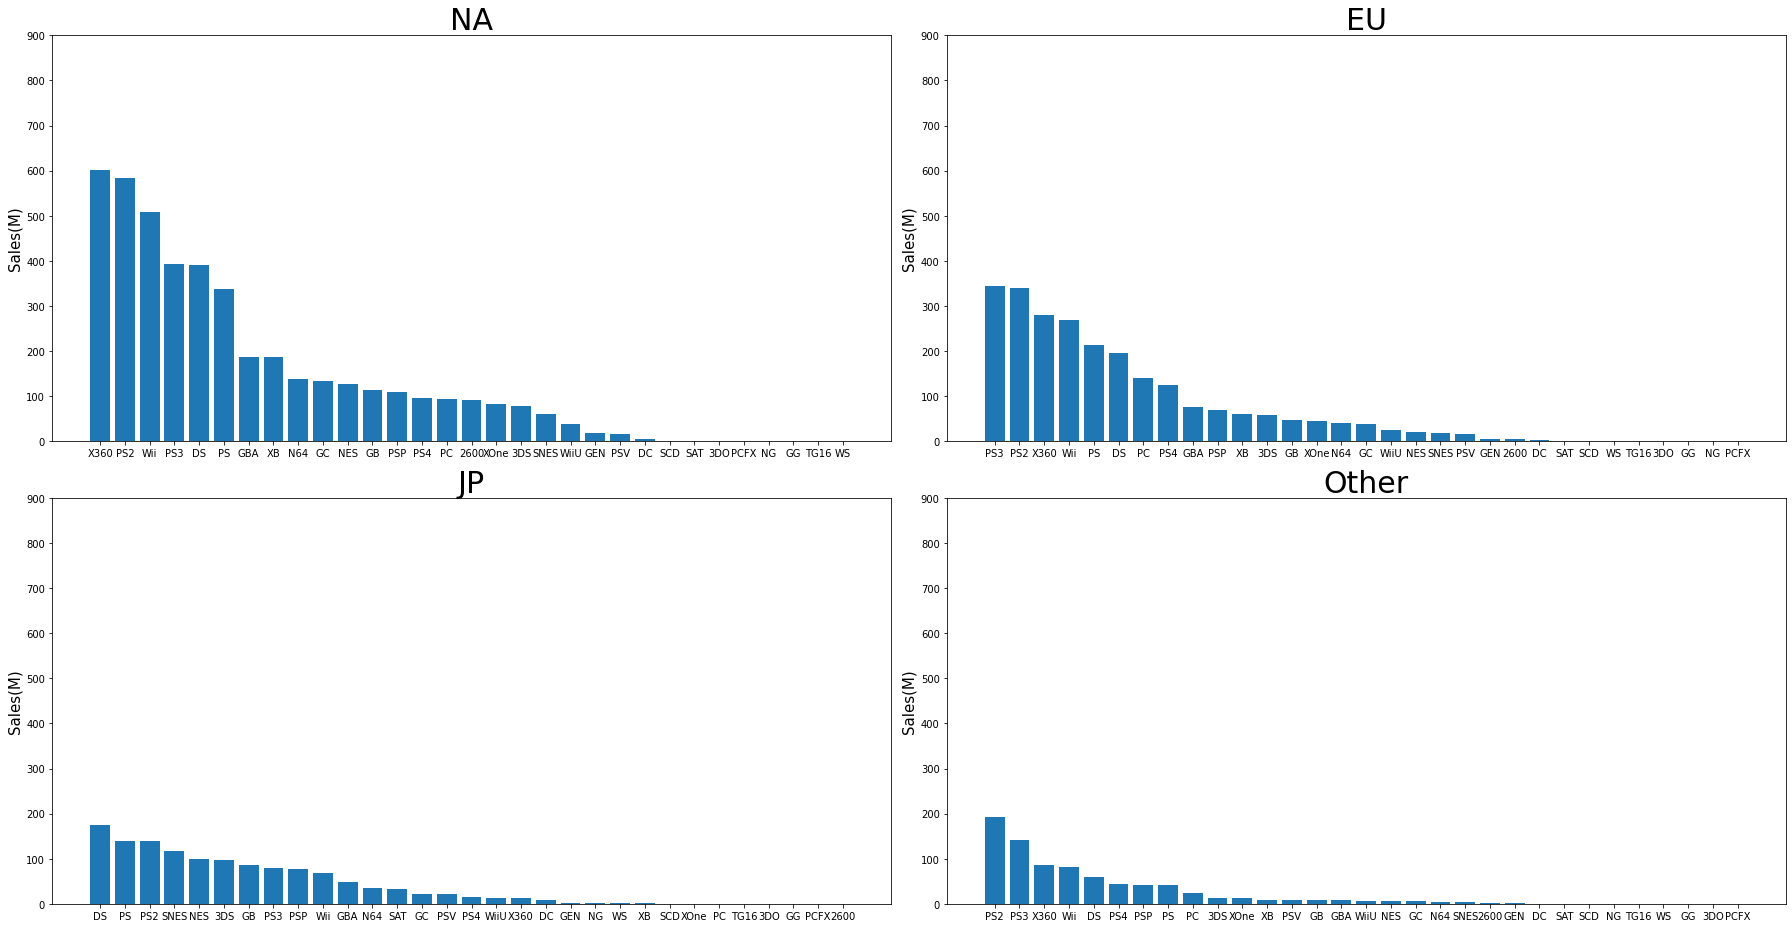

In [ ]:
#@title
# 지역별 장르기준 매출현황 시각화

fig, ax = plt.subplots(2,2, figsize=(25, 13))


ax[0][0].bar(df_area_Platform_sum["NA_Sales"].sort_values(ascending=False).index, df_area_Platform_sum["NA_Sales"].sort_values(ascending=False))
ax[0][0].set_title("NA", fontsize=30)
ax[0][0].set_ylabel("Sales(M)")
ax[0][0].set_ylim(0,900)

ax[0][1].bar(df_area_Platform_sum["EU_Sales"].sort_values(ascending=False).index, df_area_Platform_sum["EU_Sales"].sort_values(ascending=False))
ax[0][1].set_title("EU", fontsize=30)
ax[0][1].set_ylabel("Sales(M)")
ax[0][1].set_ylim(0,900)

ax[1][0].bar(df_area_Platform_sum["JP_Sales"].sort_values(ascending=False).index, df_area_Platform_sum["JP_Sales"].sort_values(ascending=False))
ax[1][0].set_title("JP", fontsize=30)
ax[1][0].set_ylabel("Sales(M)")
ax[1][0].set_ylim(0,900)

ax[1][1].bar(df_area_Platform_sum["Other_Sales"].sort_values(ascending=False).index, df_area_Platform_sum["Other_Sales"].sort_values(ascending=False))
ax[1][1].set_title("Other" ,  fontsize=30)
ax[1][1].set_ylabel("Sales(M)")
ax[1][1].set_ylim(0,900) 

plt.rc("font", size=10)
plt.rc('axes', labelsize=15)

fig.tight_layout()


* 지역별 TOP3

In [ ]:
#@title
print(pd.DataFrame(df_area_Platform_sum['NA_Sales'].sort_values(ascending=False).head(3)),'\n')
print(pd.DataFrame(df_area_Platform_sum['EU_Sales'].sort_values(ascending=False).head(3)),'\n')
print(pd.DataFrame(df_area_Platform_sum['JP_Sales'].sort_values(ascending=False).head(3)),'\n')
print(pd.DataFrame(df_area_Platform_sum['Other_Sales'].sort_values(ascending=False).head(3)),'\n')

          NA_Sales
Platform          
X360        601.05
PS2         583.84
Wii         507.71 

          EU_Sales
Platform          
PS3         343.71
PS2         339.29
X360        280.58 

          JP_Sales
Platform          
DS          175.57
PS          139.82
PS2         139.20 

          Other_Sales
Platform             
PS2            193.44
PS3            141.93
X360            85.54 



## 1.4 지역별 퍼블리셔 선호도

* Publishe별 그룹화

In [ ]:
#@title
df_area_publisher = df[["Publisher","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
df_area_publisher.set_index("Publisher", inplace=True)
df_area_publisher_sum = df_area_publisher.groupby("Publisher").sum()
df_area_publisher_sum.index = df_area_publisher_sum.index.str.replace("Entertainment", "Ent")
df_area_publisher_sum2 = df_area_publisher_sum
df_area_publisher_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
10TACLE Studios,0.07,0.04,0.00,0.00
1C Company,0.01,0.07,0.00,0.02
20th Century Fox Video Games,1.82,0.10,0.00,0.01
2D Boy,0.00,0.03,0.00,0.01
3DO,6.48,3.04,0.00,0.63
...,...,...,...,...
id Software,0.02,0.00,0.00,0.00
imageepoch Inc.,0.00,0.00,0.04,0.00
inXile Ent,0.02,0.06,0.00,0.01


* 시각화(출고량 기준 상위 10개)

In [ ]:
#@title
publisher_NA = df_area_publisher_sum["NA_Sales"].sort_values(ascending=False).head(10)
publisher_EU = df_area_publisher_sum["EU_Sales"].sort_values(ascending=False).head(10) 
publisher_JP = df_area_publisher_sum["JP_Sales"].sort_values(ascending=False).head(10)
publisher_Other = df_area_publisher_sum["Other_Sales"].sort_values(ascending=False).head(10)

publisher_NA2 = df_area_publisher_sum["NA_Sales"].sort_values(ascending=False).head(10)
publisher_EU2 = df_area_publisher_sum["EU_Sales"].sort_values(ascending=False).head(10) 
publisher_JP2 = df_area_publisher_sum["JP_Sales"].sort_values(ascending=False).head(10)
publisher_Other2 = df_area_publisher_sum["Other_Sales"].sort_values(ascending=False).head(10)


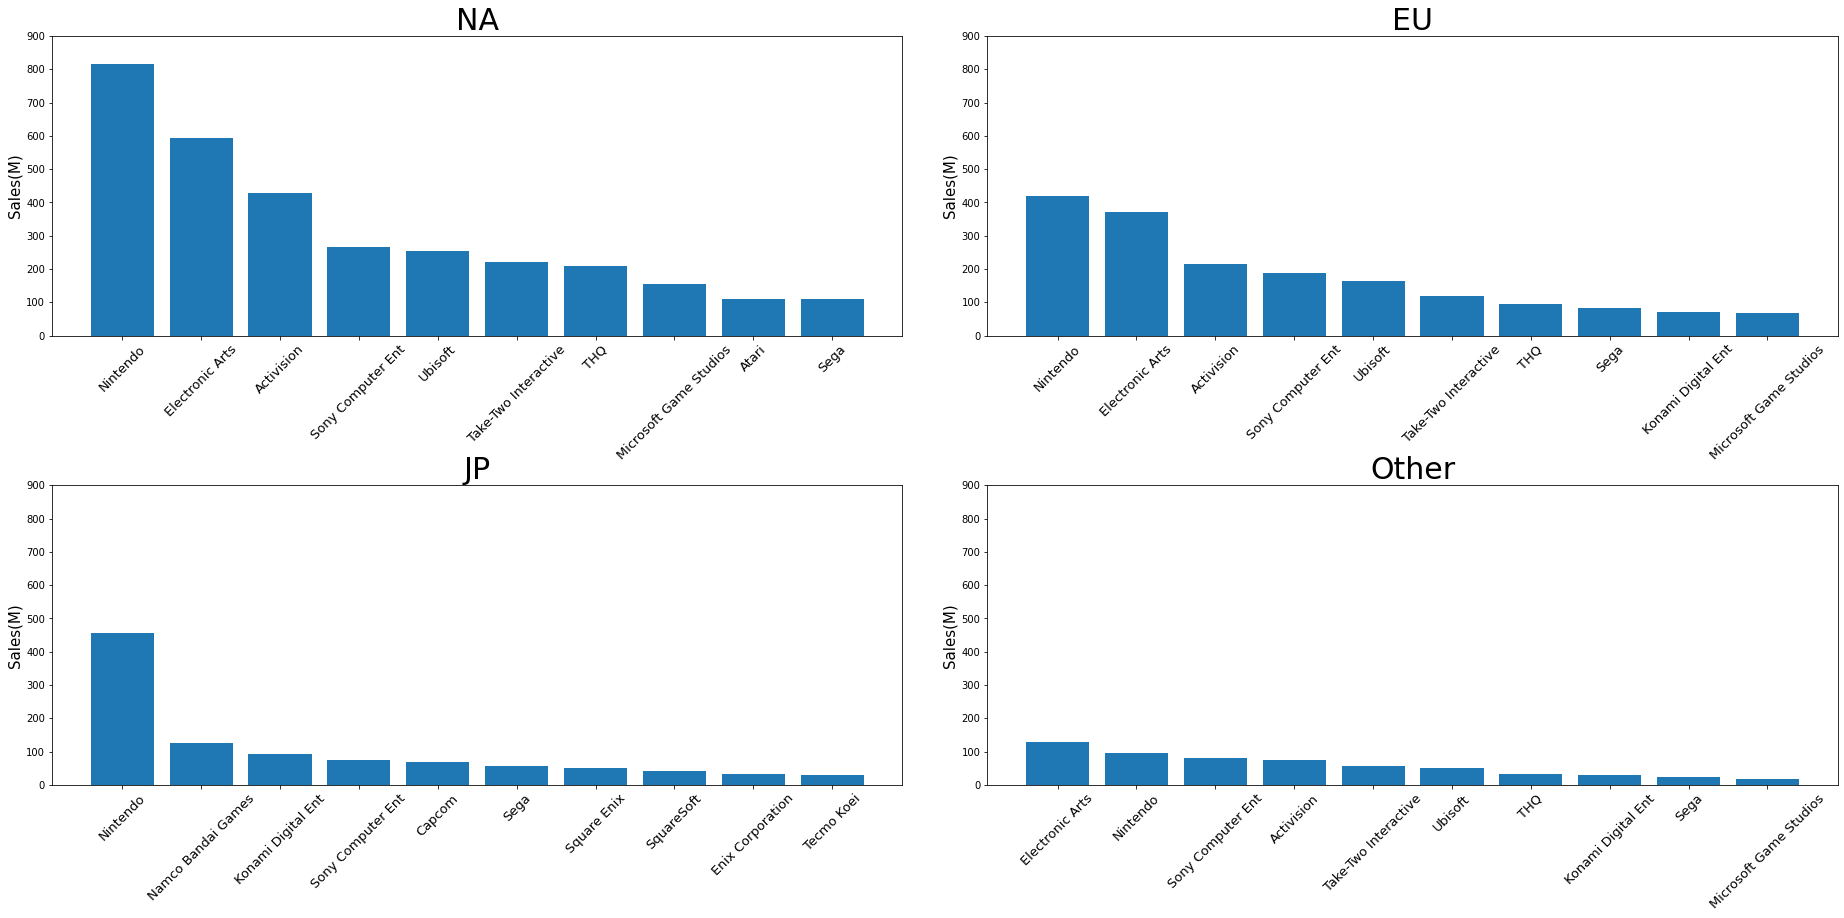

In [ ]:
#@title
#시각화
f,ax = plt.subplots(2,2, figsize=(32,13))

ax[0][0].bar(publisher_NA.index, publisher_NA.values)
ax[0][0].set_title("NA", fontsize=30)
ax[0][0].set_ylabel("Sales(M)")
ax[0][0].set_ylim(0,900)
ax[0][0].set_xticklabels(publisher_NA.index, rotation=45, fontsize=13)


ax[0][1].bar(publisher_EU.index, publisher_EU.values)
ax[0][1].set_title("EU", fontsize=30)
ax[0][1].set_ylabel("Sales(M)")
ax[0][1].set_ylim(0,900)
ax[0][1].set_xticklabels(publisher_EU.index, rotation=45, fontsize=13)


ax[1][0].bar(publisher_JP.index, publisher_JP.values)
ax[1][0].set_title("JP", fontsize=30)
ax[1][0].set_ylabel("Sales(M)")
ax[1][0].set_ylim(0,900)
ax[1][0].set_xticklabels(publisher_JP.index, rotation=45, fontsize=13)


ax[1][1].bar(publisher_Other.index, publisher_Other.values)
ax[1][1].set_title("Other", fontsize=30)
ax[1][1].set_ylabel("Sales(M)")
ax[1][1].set_ylim(0,900)
ax[1][1].set_xticklabels(publisher_Other.index, rotation=45, fontsize=13)


plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.5)


* 지역별 TOP4

In [ ]:
#@title

print("NA\n",publisher_NA2.head(4), end='\n\n')
print("EU\n",publisher_EU2.head(4), end='\n\n')
print("JP\n",publisher_JP2.head(4), end='\n\n')
print("Other\n",publisher_Other2.head(4), end='\n\n')


NA
 Publisher
Nintendo             816.87
Electronic Arts      595.07
Activision           429.70
Sony Computer Ent    265.22
Name: NA_Sales, dtype: float64

EU
 Publisher
Nintendo             418.74
Electronic Arts      371.27
Activision           215.53
Sony Computer Ent    187.72
Name: EU_Sales, dtype: float64

JP
 Publisher
Nintendo              455.44
Namco Bandai Games    127.08
Konami Digital Ent     91.30
Sony Computer Ent      74.10
Name: JP_Sales, dtype: float64

Other
 Publisher
Electronic Arts      129.77
Nintendo              95.33
Sony Computer Ent     80.45
Activision            75.34
Name: Other_Sales, dtype: float64



* NA, EU 제작사 F분석

> 귀무가설 : NA표본집단과 EU표본집단의 제작사별 분포가 같다.

> 대립가설 : NA표본집단과 EU표본집단의 제작사별 분포가 다르다.


In [ ]:
#@title
publisher_NA = minmax.fit_transform(pd.DataFrame(publisher_NA))
publisher_EU = minmax.fit_transform(pd.DataFrame(publisher_EU))


print("* 스케일링 X",)
print(f_oneway(publisher_NA2, publisher_EU2),'\n')
print("* 스케일링 O")
print(f_oneway(publisher_NA, publisher_EU))



* 스케일링 X
F_onewayResult(statistic=2.740694610233629, pvalue=0.11515210857081914) 

* 스케일링 O
F_onewayResult(statistic=array([0.02206293]), pvalue=array([0.88357119]))


> P_Value >0.05

> 귀무가설 기각 X

# 2.연도별 분석

## 2.1 연도별 출고량 동향

* 연도에 따른 지역별 출고량

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


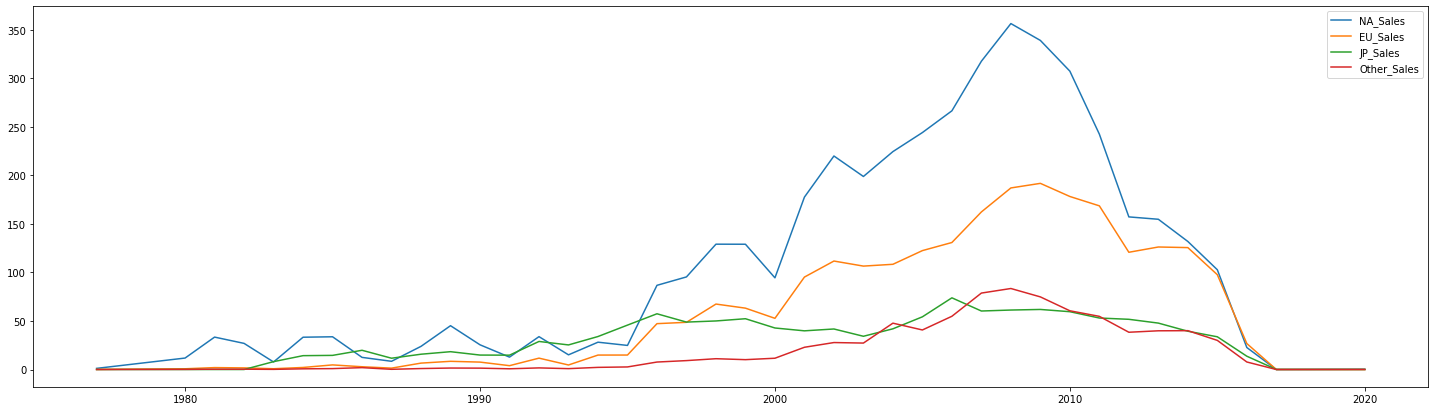

In [ ]:
#@title
df = df.drop(df[df["Year"]==-1].index)
# 연도별 분석을 위해 -1로 저장했던 결측치 제거

#@title
df_year=df.groupby("Year")["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].sum()
df_year=df_year.reset_index()

plt.figure(figsize=(25,7))

for i in df_year.columns.drop("Year"):
    plt.plot(df_year["Year"], df_year[i])

plt.legend(df_year.columns.drop("Year"))

plt.show()

* 최근 시장 점유율(2010년 이후)

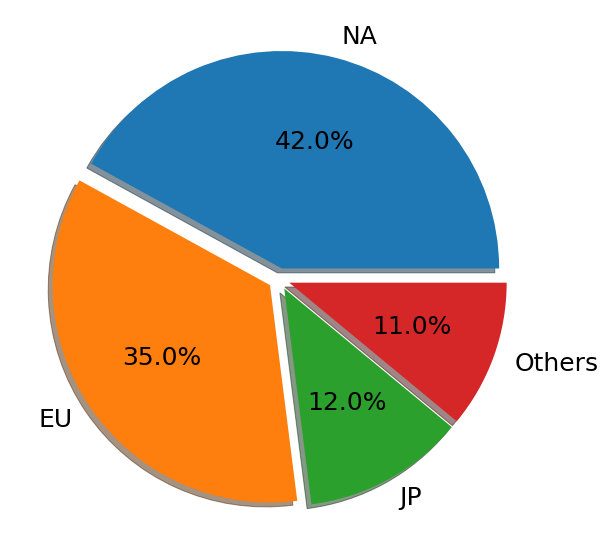

In [ ]:
#@title
df2 = df[df["Year"]>2010]
ratio = [round(df2["NA_Sales"].sum()/df2["Total_Sales"].sum(),2),round(df2["EU_Sales"].sum()/df2["Total_Sales"].sum(),2),round(df2["JP_Sales"].sum()/df2["Total_Sales"].sum(),2),round(df2["Other_Sales"].sum()/df2["Total_Sales"].sum(),2)]
labels = ["NA", "EU", "JP", "Others"]

plt.figure(figsize=(10,10))
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=[0.05,0.05,0.05,0.05], shadow=True, textprops={'size':25})
plt.show()

## 2.2 연도별 장르 선호도

* 시각화(연도별 출고량 상위 5)

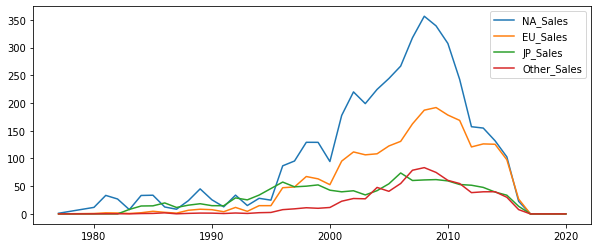

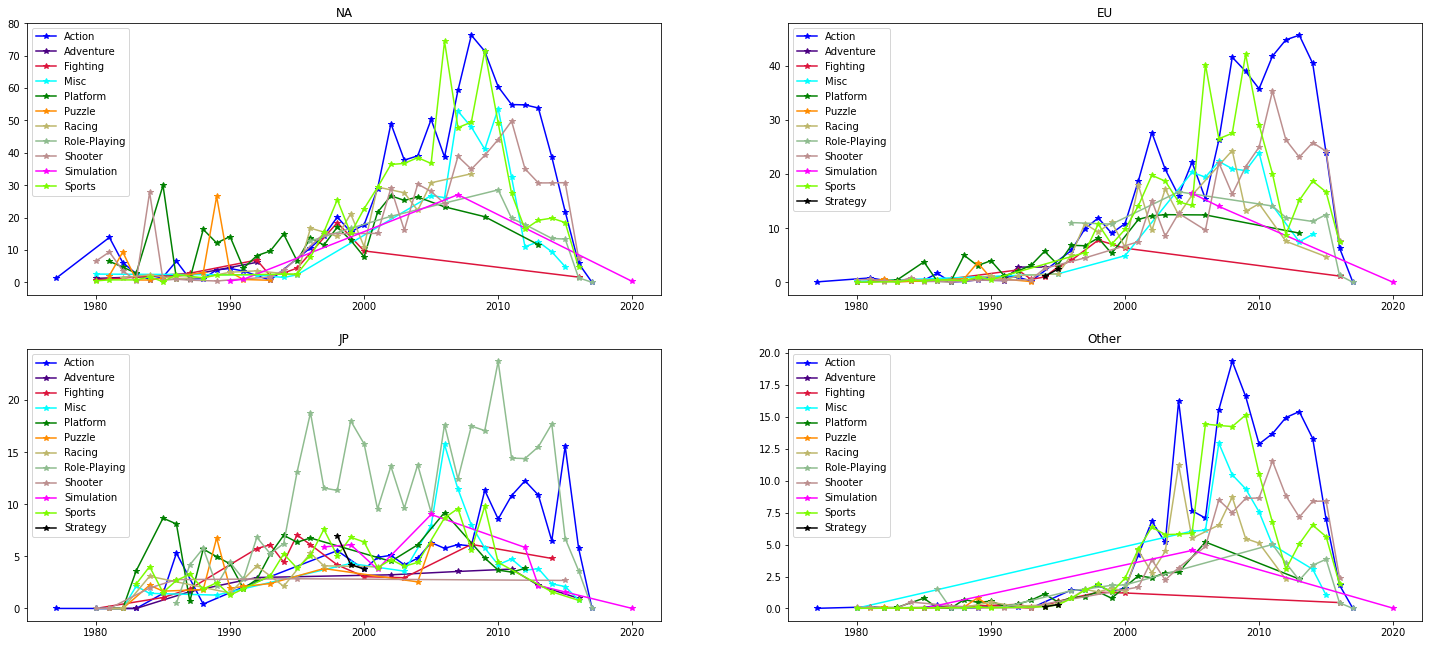

In [ ]:
#@title

#@title
#NA

df_year_NA_genre_before = df.groupby(["Year", "Genre"])["NA_Sales"].sum()
df_year_NA_genre_before = pd.DataFrame(df_year_NA_genre_before)
df_year_NA_genre_before.reset_index(level=["Genre"], inplace=True)
df_year_NA_genre_before

df_year_NA_genre = pd.DataFrame(columns = ["Genre", "NA_Sales"])

for i in df_year_NA_genre_before.index.unique():
    if len(df_year_NA_genre_before.loc[i])<6:
        plus = df_year_NA_genre_before.loc[i]
    else:
        plus = df_year_NA_genre_before.loc[i].nlargest(5,"NA_Sales")
    
    df_year_NA_genre = df_year_NA_genre.append(plus)

df_year_NA_genre.reset_index(inplace=True)
df_year_NA_genre.columns = ["Year", "Genre", "Sales"]
df_year_NA_genre = df_year_NA_genre.groupby(["Genre", "Year"]).sum()
df_year_NA_genre.reset_index(level=["Year"], inplace=True)

genre_NA_list = df_year_NA_genre.index.unique().tolist()


#EU

df_year_EU_genre_before = df.groupby(["Year", "Genre"])["EU_Sales"].sum()
df_year_EU_genre_before = pd.DataFrame(df_year_EU_genre_before)
df_year_EU_genre_before.reset_index(level=["Genre"], inplace=True)
df_year_EU_genre_before

df_year_EU_genre = pd.DataFrame(columns = ["Genre", "EU_Sales"])

for i in df_year_EU_genre_before.index.unique():
    if len(df_year_EU_genre_before.loc[i])<6:
        plus = df_year_EU_genre_before.loc[i]
    else:
        plus = df_year_EU_genre_before.loc[i].nlargest(5,"EU_Sales")
    
    df_year_EU_genre = df_year_EU_genre.append(plus)

df_year_EU_genre.reset_index(inplace=True)
df_year_EU_genre.columns = ["Year", "Genre", "Sales"]
df_year_EU_genre = df_year_EU_genre.groupby(["Genre", "Year"]).sum()
df_year_EU_genre.reset_index(level=["Year"], inplace=True)

genre_EU_list = df_year_EU_genre.index.unique().tolist()



#JP

df_year_JP_genre_before = df.groupby(["Year", "Genre"])["JP_Sales"].sum()
df_year_JP_genre_before = pd.DataFrame(df_year_JP_genre_before)
df_year_JP_genre_before.reset_index(level=["Genre"], inplace=True)
df_year_JP_genre_before

df_year_JP_genre = pd.DataFrame(columns = ["Genre", "JP_Sales"])

for i in df_year_JP_genre_before.index.unique():
    if len(df_year_JP_genre_before.loc[i])<6:
        plus = df_year_JP_genre_before.loc[i]
    else:
        plus = df_year_JP_genre_before.loc[i].nlargest(5,"JP_Sales")
    
    df_year_JP_genre = df_year_JP_genre.append(plus)

df_year_JP_genre.reset_index(inplace=True)
df_year_JP_genre.columns = ["Year", "Genre", "Sales"]
df_year_JP_genre = df_year_JP_genre.groupby(["Genre", "Year"]).sum()
df_year_JP_genre.reset_index(level=["Year"], inplace=True)

genre_JP_list = df_year_JP_genre.index.unique().tolist()



#Other

df_year_Other_genre_before = df.groupby(["Year", "Genre"])["Other_Sales"].sum()
df_year_Other_genre_before = pd.DataFrame(df_year_Other_genre_before)
df_year_Other_genre_before.reset_index(level=["Genre"], inplace=True)
df_year_Other_genre_before

df_year_Other_genre = pd.DataFrame(columns = ["Genre", "Other_Sales"])

for i in df_year_Other_genre_before.index.unique():
    if len(df_year_Other_genre_before.loc[i])<6:
        plus = df_year_Other_genre_before.loc[i]
    else:
        plus = df_year_Other_genre_before.loc[i].nlargest(5,"Other_Sales")
    
    df_year_Other_genre = df_year_Other_genre.append(plus)

df_year_Other_genre.reset_index(inplace=True)
df_year_Other_genre.columns = ["Year", "Genre", "Sales"]
df_year_Other_genre = df_year_Other_genre.groupby(["Genre", "Year"]).sum()
df_year_Other_genre.reset_index(level=["Year"], inplace=True)

genre_Other_list = df_year_Other_genre.index.unique().tolist()



# 시각화

plt.figure(figsize=(10,4))

for i in df_year.columns.drop("Year"):
    plt.plot(df_year["Year"], df_year[i])

plt.legend(df_year.columns.drop("Year"))

plt.show()

fig, ax = plt.subplots(2,2, figsize=(25, 11))

colors = ["blue", "indigo", "crimson", "aqua", "green", "darkorange", "darkkhaki", "darkseagreen", "rosybrown", "magenta", "lawngreen", "black", "blueviolet", "gold", "dimgrey", "gold", "pink", "tomato", "tan", "brown", "peru"]

for i in genre_NA_list:
    ax[0][0].plot(df_year_NA_genre.loc[i,"Year"], df_year_NA_genre.loc[i,"Sales"], color=colors[genre_NA_list.index(i)],marker='*')

ax[0][0].set_title("NA")
ax[0][0].legend(genre_NA_list, loc='upper left')


for i in genre_EU_list:
    ax[0][1].plot(df_year_EU_genre.loc[i,"Year"], df_year_EU_genre.loc[i,"Sales"], color=colors[genre_EU_list.index(i)],marker='*')

ax[0][1].set_title("EU")
ax[0][1].legend(genre_EU_list)


for i in genre_JP_list:
    ax[1][0].plot(df_year_JP_genre.loc[i,"Year"], df_year_JP_genre.loc[i,"Sales"], color=colors[genre_JP_list.index(i)],marker='*')

ax[1][0].set_title("JP")
ax[1][0].legend(genre_JP_list)


for i in genre_Other_list:
    ax[1][1].plot(df_year_Other_genre.loc[i,"Year"], df_year_Other_genre.loc[i,"Sales"], color=colors[genre_Other_list.index(i)],marker='*')

ax[1][1].set_title("Other")
ax[1][1].legend(genre_Other_list)

## 2.3 연도별 플랫폼 선호도

* 시각화(2005년 이후)

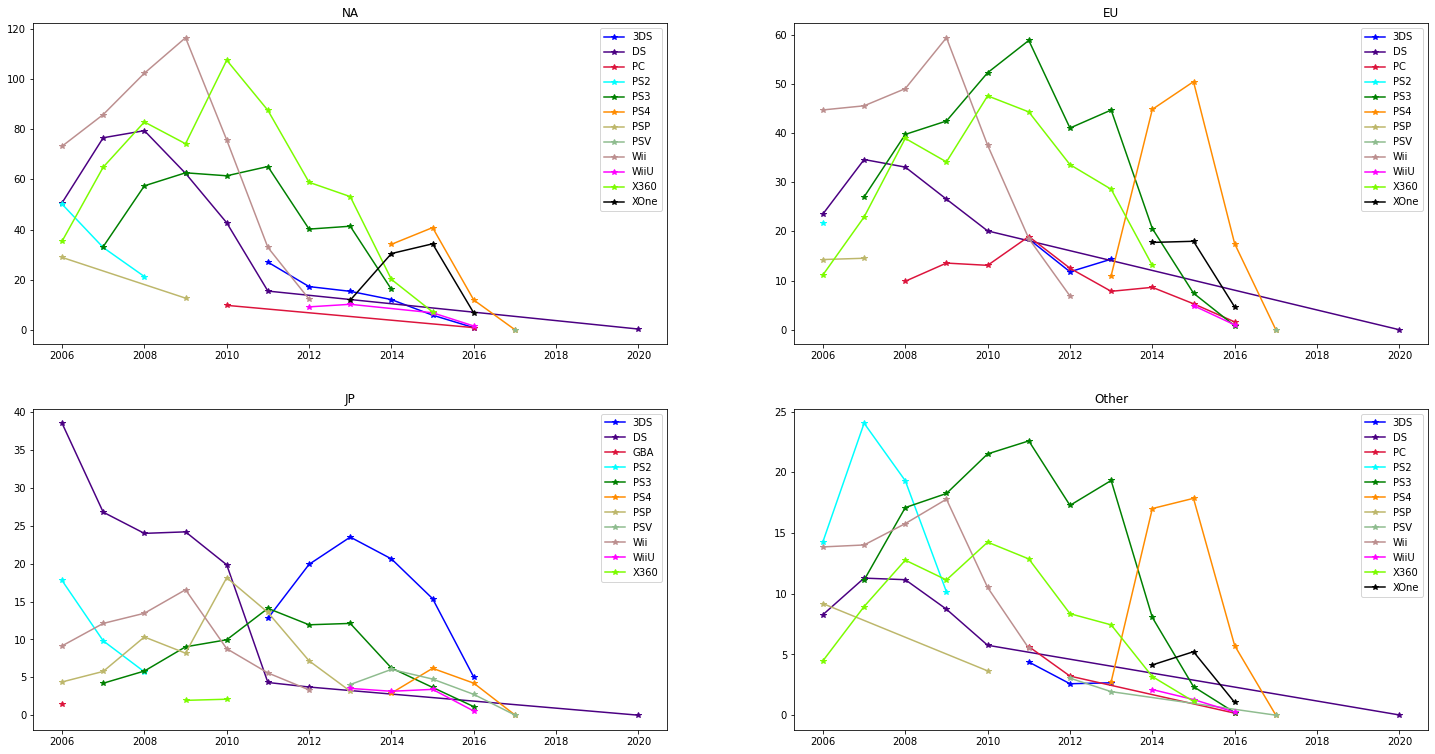

In [ ]:
#@title

#@title

#@title
df2 = df #(임시 이동)

df = df[df["Year"]>2005]


#NA

df_year_NA_Platform_before = df.groupby(["Year", "Platform"])["NA_Sales"].sum()
df_year_NA_Platform_before = pd.DataFrame(df_year_NA_Platform_before)
df_year_NA_Platform_before.reset_index(level=["Platform"], inplace=True)
df_year_NA_Platform_before

df_year_NA_Platform = pd.DataFrame(columns = ["Platform", "NA_Sales"])

for i in df_year_NA_Platform_before.index.unique():
    if len(df_year_NA_Platform_before.loc[i])<6:
        plus = df_year_NA_Platform_before.loc[i]
    else:
        plus = df_year_NA_Platform_before.loc[i].nlargest(5,"NA_Sales")
    
    df_year_NA_Platform = df_year_NA_Platform.append(plus)

df_year_NA_Platform.reset_index(inplace=True)
df_year_NA_Platform.columns = ["Year", "Platform", "Sales"]
df_year_NA_Platform = df_year_NA_Platform.groupby(["Platform", "Year"]).sum()
df_year_NA_Platform.reset_index(level=["Year"], inplace=True)

Platform_NA_list = df_year_NA_Platform.index.unique().tolist()


#EU

df_year_EU_Platform_before = df.groupby(["Year", "Platform"])["EU_Sales"].sum()
df_year_EU_Platform_before = pd.DataFrame(df_year_EU_Platform_before)
df_year_EU_Platform_before.reset_index(level=["Platform"], inplace=True)
df_year_EU_Platform_before

df_year_EU_Platform = pd.DataFrame(columns = ["Platform", "EU_Sales"])

for i in df_year_EU_Platform_before.index.unique():
    if len(df_year_EU_Platform_before.loc[i])<6:
        plus = df_year_EU_Platform_before.loc[i]
    else:
        plus = df_year_EU_Platform_before.loc[i].nlargest(5,"EU_Sales")
    
    df_year_EU_Platform = df_year_EU_Platform.append(plus)

df_year_EU_Platform.reset_index(inplace=True)
df_year_EU_Platform.columns = ["Year", "Platform", "Sales"]
df_year_EU_Platform = df_year_EU_Platform.groupby(["Platform", "Year"]).sum()
df_year_EU_Platform.reset_index(level=["Year"], inplace=True)

Platform_EU_list = df_year_EU_Platform.index.unique().tolist()



#JP

df_year_JP_Platform_before = df.groupby(["Year", "Platform"])["JP_Sales"].sum()
df_year_JP_Platform_before = pd.DataFrame(df_year_JP_Platform_before)
df_year_JP_Platform_before.reset_index(level=["Platform"], inplace=True)
df_year_JP_Platform_before

df_year_JP_Platform = pd.DataFrame(columns = ["Platform", "JP_Sales"])

for i in df_year_JP_Platform_before.index.unique():
    if len(df_year_JP_Platform_before.loc[i])<6:
        plus = df_year_JP_Platform_before.loc[i]
    else:
        plus = df_year_JP_Platform_before.loc[i].nlargest(5,"JP_Sales")
    
    df_year_JP_Platform = df_year_JP_Platform.append(plus)

df_year_JP_Platform.reset_index(inplace=True)
df_year_JP_Platform.columns = ["Year", "Platform", "Sales"]
df_year_JP_Platform = df_year_JP_Platform.groupby(["Platform", "Year"]).sum()
df_year_JP_Platform.reset_index(level=["Year"], inplace=True)

Platform_JP_list = df_year_JP_Platform.index.unique().tolist()



#Other

df_year_Other_Platform_before = df.groupby(["Year", "Platform"])["Other_Sales"].sum()
df_year_Other_Platform_before = pd.DataFrame(df_year_Other_Platform_before)
df_year_Other_Platform_before.reset_index(level=["Platform"], inplace=True)
df_year_Other_Platform_before

df_year_Other_Platform = pd.DataFrame(columns = ["Platform", "Other_Sales"])

for i in df_year_Other_Platform_before.index.unique():
    if len(df_year_Other_Platform_before.loc[i])<6:
        plus = df_year_Other_Platform_before.loc[i]
    else:
        plus = df_year_Other_Platform_before.loc[i].nlargest(5,"Other_Sales")
    
    df_year_Other_Platform = df_year_Other_Platform.append(plus)

df_year_Other_Platform.reset_index(inplace=True)
df_year_Other_Platform.columns = ["Year", "Platform", "Sales"]
df_year_Other_Platform = df_year_Other_Platform.groupby(["Platform", "Year"]).sum()
df_year_Other_Platform.reset_index(level=["Year"], inplace=True)

Platform_Other_list = df_year_Other_Platform.index.unique().tolist()



# 시각화

fig, ax = plt.subplots(2,2, figsize=(25, 13))


for i in Platform_NA_list:
    ax[0][0].plot(df_year_NA_Platform.loc[i,"Year"], df_year_NA_Platform.loc[i,"Sales"],color=colors[Platform_NA_list.index(i)], marker='*')
    
ax[0][0].set_title("NA")
ax[0][0].legend(Platform_NA_list)


for i in Platform_EU_list:
    ax[0][1].plot(df_year_EU_Platform.loc[i,"Year"], df_year_EU_Platform.loc[i,"Sales"],color=colors[Platform_EU_list.index(i)], marker='*')

ax[0][1].set_title("EU")
ax[0][1].legend(Platform_EU_list)



for i in Platform_JP_list:
    ax[1][0].plot(df_year_JP_Platform.loc[i,"Year"], df_year_JP_Platform.loc[i,"Sales"],color=colors[Platform_JP_list.index(i)], marker='*')

ax[1][0].set_title("JP")
ax[1][0].legend(Platform_JP_list)



for i in Platform_Other_list:
    ax[1][1].plot(df_year_Other_Platform.loc[i,"Year"], df_year_Other_Platform.loc[i,"Sales"],color=colors[Platform_Other_list.index(i)], marker='*')

ax[1][1].set_title("Other")
ax[1][1].legend(Platform_Other_list)


> PS2 -> PS3 -> PS4 

> 닌텐도DS -> 닌텐도3DS

> Wii -> WiiU

 > X360 -> XOne

## 2.4 연도별 퍼블리셔 선호도

* 시각화(연도별 출고량 상위 3)

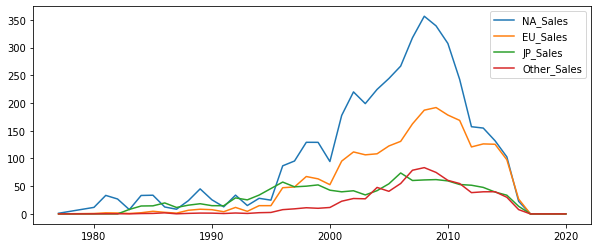

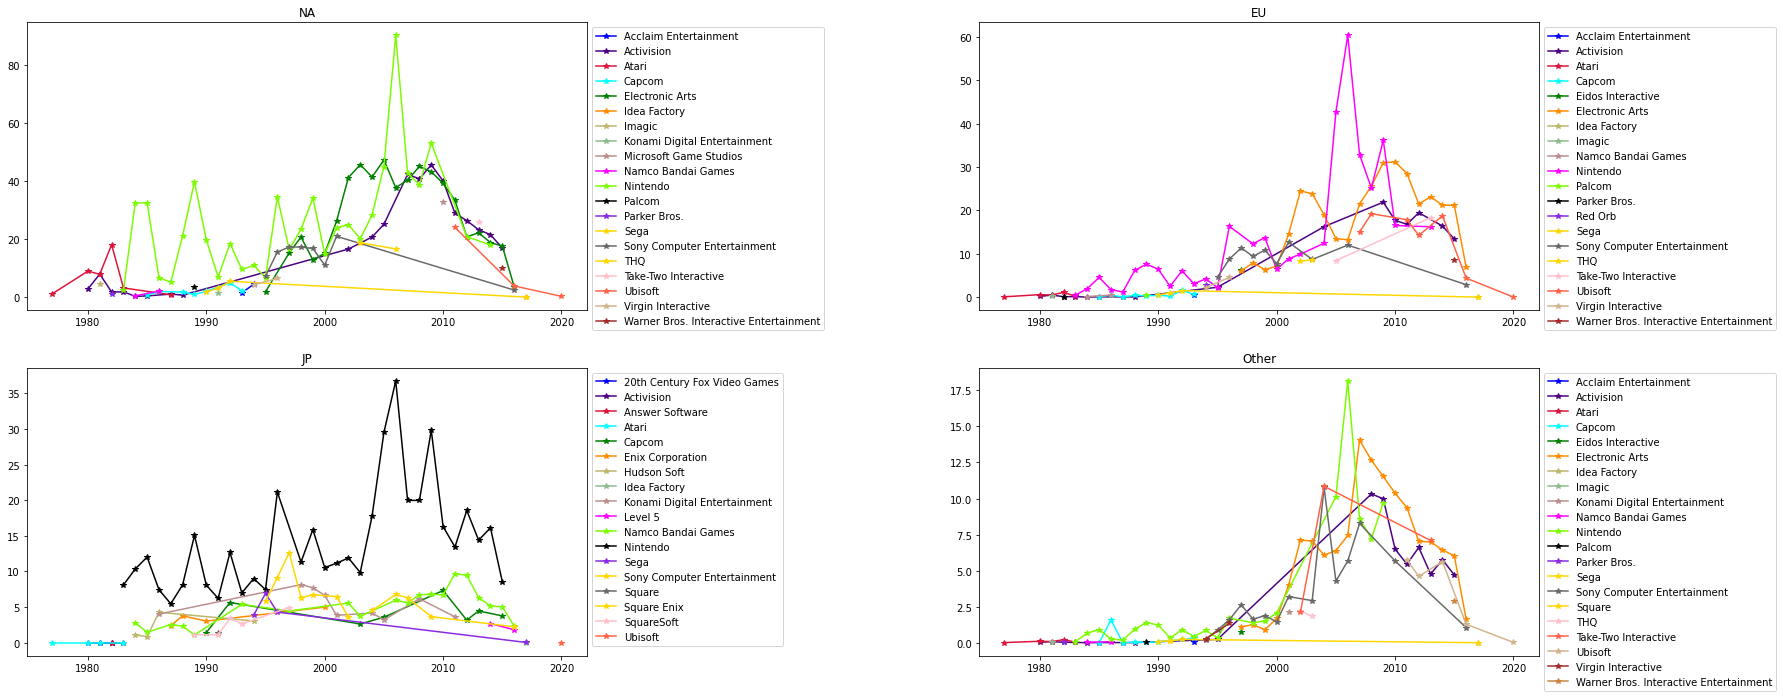

In [ ]:
#@title
df = df2

#NA

df_year_NA_Publisher_before = df.groupby(["Year", "Publisher"])["NA_Sales"].sum()
df_year_NA_Publisher_before = pd.DataFrame(df_year_NA_Publisher_before)
df_year_NA_Publisher_before.reset_index(level=["Publisher"], inplace=True)
df_year_NA_Publisher_before

df_year_NA_Publisher = pd.DataFrame(columns = ["Publisher", "NA_Sales"])

for i in df_year_NA_Publisher_before.index.unique():
    if len(df_year_NA_Publisher_before.loc[i])<4:
        plus = df_year_NA_Publisher_before.loc[i]
    else:
        plus = df_year_NA_Publisher_before.loc[i].nlargest(3,"NA_Sales")
    
    df_year_NA_Publisher = df_year_NA_Publisher.append(plus)

df_year_NA_Publisher.reset_index(inplace=True)
df_year_NA_Publisher.columns = ["Year", "Publisher", "Sales"]
df_year_NA_Publisher = df_year_NA_Publisher.groupby(["Publisher", "Year"]).sum()
df_year_NA_Publisher.reset_index(level=["Year"], inplace=True)

Publisher_NA_list = df_year_NA_Publisher.index.unique().tolist()


#EU

df_year_EU_Publisher_before = df.groupby(["Year", "Publisher"])["EU_Sales"].sum()
df_year_EU_Publisher_before = pd.DataFrame(df_year_EU_Publisher_before)
df_year_EU_Publisher_before.reset_index(level=["Publisher"], inplace=True)
df_year_EU_Publisher_before

df_year_EU_Publisher = pd.DataFrame(columns = ["Publisher", "EU_Sales"])

for i in df_year_EU_Publisher_before.index.unique():
    if len(df_year_EU_Publisher_before.loc[i])<4:
        plus = df_year_EU_Publisher_before.loc[i]
    else:
        plus = df_year_EU_Publisher_before.loc[i].nlargest(3,"EU_Sales")
    
    df_year_EU_Publisher = df_year_EU_Publisher.append(plus)

df_year_EU_Publisher.reset_index(inplace=True)
df_year_EU_Publisher.columns = ["Year", "Publisher", "Sales"]
df_year_EU_Publisher = df_year_EU_Publisher.groupby(["Publisher", "Year"]).sum()
df_year_EU_Publisher.reset_index(level=["Year"], inplace=True)

Publisher_EU_list = df_year_EU_Publisher.index.unique().tolist()



#JP

df_year_JP_Publisher_before = df.groupby(["Year", "Publisher"])["JP_Sales"].sum()
df_year_JP_Publisher_before = pd.DataFrame(df_year_JP_Publisher_before)
df_year_JP_Publisher_before.reset_index(level=["Publisher"], inplace=True)
df_year_JP_Publisher_before

df_year_JP_Publisher = pd.DataFrame(columns = ["Publisher", "JP_Sales"])

for i in df_year_JP_Publisher_before.index.unique():
    if len(df_year_JP_Publisher_before.loc[i])<4:
        plus = df_year_JP_Publisher_before.loc[i]
    else:
        plus = df_year_JP_Publisher_before.loc[i].nlargest(3,"JP_Sales")
    
    df_year_JP_Publisher = df_year_JP_Publisher.append(plus)

df_year_JP_Publisher.reset_index(inplace=True)
df_year_JP_Publisher.columns = ["Year", "Publisher", "Sales"]
df_year_JP_Publisher = df_year_JP_Publisher.groupby(["Publisher", "Year"]).sum()
df_year_JP_Publisher.reset_index(level=["Year"], inplace=True)

Publisher_JP_list = df_year_JP_Publisher.index.unique().tolist()



#Other

df_year_Other_Publisher_before = df.groupby(["Year", "Publisher"])["Other_Sales"].sum()
df_year_Other_Publisher_before = pd.DataFrame(df_year_Other_Publisher_before)
df_year_Other_Publisher_before.reset_index(level=["Publisher"], inplace=True)
df_year_Other_Publisher_before

df_year_Other_Publisher = pd.DataFrame(columns = ["Publisher", "Other_Sales"])

for i in df_year_Other_Publisher_before.index.unique():
    if len(df_year_Other_Publisher_before.loc[i])<4:
        plus = df_year_Other_Publisher_before.loc[i]
    else:
        plus = df_year_Other_Publisher_before.loc[i].nlargest(3,"Other_Sales")
    
    df_year_Other_Publisher = df_year_Other_Publisher.append(plus)

df_year_Other_Publisher.reset_index(inplace=True)
df_year_Other_Publisher.columns = ["Year", "Publisher", "Sales"]
df_year_Other_Publisher = df_year_Other_Publisher.groupby(["Publisher", "Year"]).sum()
df_year_Other_Publisher.reset_index(level=["Year"], inplace=True)

Publisher_Other_list = df_year_Other_Publisher.index.unique().tolist()



# 시각화

plt.figure(figsize=(10,4))

for i in df_year.columns.drop("Year"):
    plt.plot(df_year["Year"], df_year[i])

plt.legend(df_year.columns.drop("Year"))

fig, ax = plt.subplots(2,2, figsize=(35, 11))


for i in Publisher_NA_list:
    ax[0][0].plot(df_year_NA_Publisher.loc[i,"Year"], df_year_NA_Publisher.loc[i,"Sales"],color=colors[Publisher_NA_list.index(i)], marker='*')
ax[0][0].set_title("NA")
ax[0][0].legend(Publisher_NA_list,bbox_to_anchor=(1.0, 1.0), loc='upper left')


for i in Publisher_EU_list:
    ax[0][1].plot(df_year_EU_Publisher.loc[i,"Year"], df_year_EU_Publisher.loc[i,"Sales"],color=colors[Publisher_EU_list.index(i)], marker='*')

ax[0][1].set_title("EU")
ax[0][1].legend(Publisher_EU_list,bbox_to_anchor=(1.0, 1.0), loc='upper left')



for i in Publisher_JP_list:
    ax[1][0].plot(df_year_JP_Publisher.loc[i,"Year"], df_year_JP_Publisher.loc[i,"Sales"],color=colors[Publisher_JP_list.index(i)], marker='*')

ax[1][0].set_title("JP")
ax[1][0].legend(Publisher_JP_list,bbox_to_anchor=(1.0, 1.0), loc='upper left')



for i in Publisher_Other_list:
    ax[1][1].plot(df_year_Other_Publisher.loc[i,"Year"], df_year_Other_Publisher.loc[i,"Sales"], color=colors[Publisher_Other_list.index(i)], marker='*')

ax[1][1].set_title("Other")
ax[1][1].legend(Publisher_Other_list,bbox_to_anchor=(1.0, 1.0), loc='upper left')


plt.subplots_adjust(left=0.3, bottom=0.1, right=0.9, top=0.9, wspace=0.7, hspace=0.2)


# 3.분석총괄 및 전략

**> 1파트와 2파트의 분석결과는 큰 차이가 없다.**

- 게임출고량이 2000년 이후 폭발적으로 상승해 출고량이 대부분이 최근데이터로 구성되어 있기 때문이다.




**> 북미, 유럽시장의 큰 시장 점유율** 
* 1995년 급격한 성장으로 현재 게임시장에서 북미와 유럽시장이 큰 주축이라 할 수 있다.

**> 시장분류 (NA,EU,Other // JP)**

* 북미와 유럽, 그외 국가들은 유행하는 장르와 플랫폼, 제작사가 유사한 모습을 보이고(특히 북미, 유럽), 일본시장은 독자적인 모습을 보여준다. 

## 북미, 유럽, 그외국가

- 액션 > 스포츠 > 슈팅

* 다양한 게임장비를 활용
* Nintendo, Electronic Art, Activision 신뢰감 👍

## 일본 

* 롤플레이 > 액션 > 스포츠
* 휴대용게임기에서 즐길 수 있는 인터페이스
* Nintendo에 신뢰감 👍

---
## 다음분기 게임 출시 계획
---

🔥
***NinTenDo와 협업, IPO를 활용한 스토리가 가미된 액션게임***